# Topic: Classification (ML+DL)

# Step 1: load data, import library

In [18]:
# step 1: Load data, import library
# import torch
# import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# define function

# def getParameters(model):
#   w,b =model.parameters()
#   w1=w[0][0].item()
#   w2=w[0][1].item()
#   b=b[0].item()
#   return w1,w2,b

# generate data =================
n_samples=500 
X,y=datasets.make_circles(n_samples=n_samples,noise=0.2,random_state=3,factor=0.2)
#print(X[0],type(X[0]),X[0].shape)



In [19]:


def plotBoundary(X,y,model):
  row_condition= (y==0)

  plt.scatter(X[row_condition,0],X[y==0,1])
  plt.scatter(X[y==1,0],X[y==1,1])

  x_span=np.linspace(min(X[:,0])-0.25,max(X[:,0])+0.25)
  y_span=np.linspace(min(X[:,1])-0.25,max(X[:,1])+0.25)
  xx,yy=np.meshgrid(x_span,y_span)
  print(x_span.shape,xx.shape)
  grid=np.c_[xx.ravel(),yy.ravel()]
  
  z=model.predict_proba(grid)
  print(type(z),z.shape)
  plt.contour(xx,yy,z)
  plt.show()


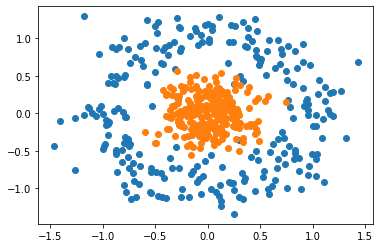

In [20]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()


# Step 2 : Preprocessing

In [21]:
#step 2 : Preprocessing for ML
print(type(X),X.shape)
print(type(y),y.shape)
print(y[:5])

#step 2 : Preprocessing for DL
# tensor_X=torch.FloatTensor(X)
# tensor_y=torch.FloatTensor(y.reshape(n_samples,1))
# print(tensor_X.size())
# print(tensor_y.size())

<class 'numpy.ndarray'> (500, 2)
<class 'numpy.ndarray'> (500,)
[0 1 0 0 0]



<img src= "https://cs231n.github.io/assets/nn1/neural_net2.jpeg" width=500 />


# Step 3: Build Model
<a href="https://medium.com/pursuitnotes/day-12-kernel-svm-non-linear-svm-5fdefe77836c">參考blog</a>

In [22]:
def plotBoundary(X,y,model):
  row_condition= (y==0)

  plt.scatter(X[row_condition,0],X[y==0,1])
  plt.scatter(X[y==1,0],X[y==1,1])

  x_span=np.linspace(min(X[:,0])-0.25,max(X[:,0])+0.25)
  y_span=np.linspace(min(X[:,1])-0.25,max(X[:,1])+0.25)
  xx,yy=np.meshgrid(x_span,y_span)
  print(x_span.shape,xx.shape)
  grid=np.c_[xx.flatten(),yy.flatten()]
  
  z=model.predict_proba(grid)
  z0=z[:,0].reshape(xx.shape)
  print(type(z0),z0.shape)
  plt.contour(xx,yy,z0,alpha=0.5)
  plt.show()

[[0.99893549 0.00106451]
 [0.00611418 0.99388582]
 [0.99198679 0.00801321]
 [0.99303311 0.00696689]
 [0.99886782 0.00113218]]
(50,) (50, 50)
<class 'numpy.ndarray'> (50, 50)


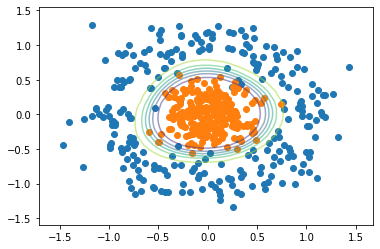

In [23]:
# step 3: Build model for ML
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
model = SVC(kernel ='rbf',random_state = 0,probability=True)

model.fit(X, y)

y_hat=model.predict_proba(X)
print(y_hat[:5])

plotBoundary(X,y,model)

# plt.scatter(X[y==0,0],X[y==0,1])
# plt.scatter(X[y==1,0],X[y==1,1])

# x_span=np.linspace(min(X[:,0])-0.25,max(X[:,0])+0.25)
# y_span=np.linspace(min(X[:,1])-0.25,max(X[:,1])+0.25)
# xx,yy=np.meshgrid(x_span,y_span)
# print(x_span.shape,'xx.shape=',xx.shape)
# grid=np.c_[xx.ravel(),yy.ravel()]
# print(grid.shape)
# z=model.predict_proba(grid)
# print('z=',z)
# print(type(z),z.shape)
# plt.contour(xx,yy,z)
# # plt.show()


In [24]:
#step 3: build model for DL

# class MyDNN(nn.Module):
#   def __init__(self,inSize,h1Size,h2Size,outSize):
#     super().__init__()
#     self.linear=nn.Linear(inSize,h1Size)
#     self.linear2=nn.Linear(h1Size,h2Size)
#     self.linear3=nn.Linear(h2Size,outSize)
#   def forward(self,x):
#       x=self.linear(x)
#       x=torch.sigmoid(x)
#       x=self.linear2(x)
#       x=torch.sigmoid(x)
#       x=self.linear3(x)
#       x=torch.sigmoid(x)
#       return x
#   def predict(self,x):
#       pred=self.forward(x)
#       if pred >=0.5: 
#         return 1
#       return 0


# model=MyDNN(2,10,4,1)
# print(model)


In [25]:
# #step 4 training
# criterion=nn.BCELoss()
# optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
# epochs=5000
# losses=[]
# for e in range(epochs):
#   #compute loss
#   if e%1000 ==0: print("*",end="")
#   y_hat=model(tensor_X)
#   loss=criterion(y_hat,tensor_y)
#   losses.append(loss)
 
#   # 3 steps for Gradient update
#   optimizer.zero_grad()
#   loss.backward()
#   optimizer.step()
# plt.plot(range(epochs),losses)



(50,) (50, 50)
<class 'numpy.ndarray'> (50, 50)


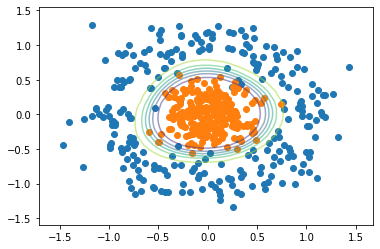

In [26]:
# plot results
plotBoundary(X,y,model)